Shauna Smith 
Week 5-7 - "5.1-7.1 P2 M1 Project "

In [107]:
import pandas as pd

In [368]:
df6=pd.read_csv(r"C:\Users\Shaun\OneDrive\Desktop\DSC680\Latest_Data_Science_Salaries.csv")

In [369]:
df6.head(1)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023


In [370]:
df6.shape

(3300, 11)

In [371]:
df6.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [372]:
dataF=df6.drop(['Salary','Salary Currency'], axis=1)

In [373]:
dataF.head(1)

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023


In [374]:
dataF['Employment Type'].unique()

array(['Full-Time', 'Contract', 'Part-Time', 'Freelance'], dtype=object)

In [375]:
dataF['Employment Type'].mask(dataF['Employment Type'] == 'Full-Time', 1, inplace=True)
dataF['Employment Type'].mask(dataF['Employment Type'] == 'Contract', 2, inplace=True)
dataF['Employment Type'].mask(dataF['Employment Type'] == 'Part-Time', 3, inplace=True)
dataF['Employment Type'].mask(dataF['Employment Type'] == 'Freelance', 4, inplace=True)

In [376]:
dataF['Expertise Level'].unique()

array(['Expert', 'Intermediate', 'Director', 'Junior'], dtype=object)

In [377]:
dataF['Expertise Level'].mask(dataF['Expertise Level'] == 'Expert', 1, inplace=True)
dataF['Expertise Level'].mask(dataF['Expertise Level'] == 'Director', 2, inplace=True)
dataF['Expertise Level'].mask(dataF['Expertise Level'] == 'Intermediate', 3, inplace=True)
dataF['Expertise Level'].mask(dataF['Expertise Level'] == 'Junior', 4, inplace=True)

In [378]:
dataF['Company Size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [379]:
dataF['Company Size'].mask(dataF['Company Size'] == 'Large', 1, inplace=True)
dataF['Company Size'].mask(dataF['Company Size'] == 'Medium', 2, inplace=True)
dataF['Company Size'].mask(dataF['Company Size'] == 'Small', 3, inplace=True)

In [380]:
dataF['Year'].unique()

array([2023, 2021, 2020, 2022], dtype=int64)

In [381]:
dataF=dataF.drop(['Experience Level','Company Location','Employee Residence'], axis=1)

In [382]:
dataF.head(1)

,Job Title,Employment Type,Expertise Level,Salary in USD,Company Size,Year
0,Data Engineer,1,1,210000,2,2023


In [383]:
dataF = dataF.rename({'Job Title': 'Job', 'Employment Type': 'Type', 'Expertise Leve': 'Expertise', 'Salary in USD': 'Salary', 'Company Size': 'Size'}, axis=1)
dataF.head(3)

,Job,Type,Expertise Level,Salary,Size,Year
0,Data Engineer,1,1,210000,2,2023
1,Data Engineer,1,1,165000,2,2023
2,Data Engineer,1,1,185900,2,2023


In [384]:
x=dataF.drop(['Job'], axis=1)
y=dataF['Job']

In [385]:
X=x.astype('int')

In [386]:
X.shape

(3300, 5)

In [387]:
y.shape

(3300,)

In [388]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [389]:
from sklearn.preprocessing import LabelEncoder
LEjob=LabelEncoder()

In [390]:
y=LEjob.fit_transform(y)

In [391]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [392]:
job_class=DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)

In [393]:
job_class.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)

In [394]:
y_pred=job_class.predict(x_test)

In [395]:
accuracy_score(y_test,y_pred)*100

19.242424242424242

In [396]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [397]:
list4Features=list(x.columns)
feature_importance=pd.Series(job_class.feature_importances_,index=list4Features).sort_values(ascending=False)
print("The following shows the rates of features impact on job class predictions: ")
print(feature_importance)

The following shows the rates of features impact on job class predictions: 
Salary             0.482045
Size               0.261838
Expertise Level    0.170513
Year               0.085603
Type               0.000000
dtype: float64


In [398]:
from sklearn.ensemble import RandomForestClassifier

In [399]:
model=RandomForestClassifier(n_estimators=10, random_state=42)

In [400]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [401]:
predictions=model.predict(x_test)

In [403]:
from sklearn import metrics

print("The accuracy of the model = ", metrics.accuracy_score(y_test, predictions)*100)

The accuracy of the model =  11.212121212121213


In [405]:
listedFeatures=list(x.columns)
feature_importance=pd.Series(model.feature_importances_,index=listedFeatures).sort_values(ascending=False)
print("The following shows the rates of features impact on job class predictions as RF: ")
print(feature_importance)

The following shows the rates of features impact on job class predictions as RF: 
Salary             0.868353
Expertise Level    0.048774
Year               0.043315
Size               0.032718
Type               0.006840
dtype: float64


In [406]:
dataF.head()

,Job,Type,Expertise Level,Salary,Size,Year
0,Data Engineer,1,1,210000,2,2023
1,Data Engineer,1,1,165000,2,2023
2,Data Engineer,1,1,185900,2,2023
3,Data Engineer,1,1,129300,2,2023
4,Data Scientist,1,1,140000,2,2023


Text(0, 0.5, 'Level of Salary')

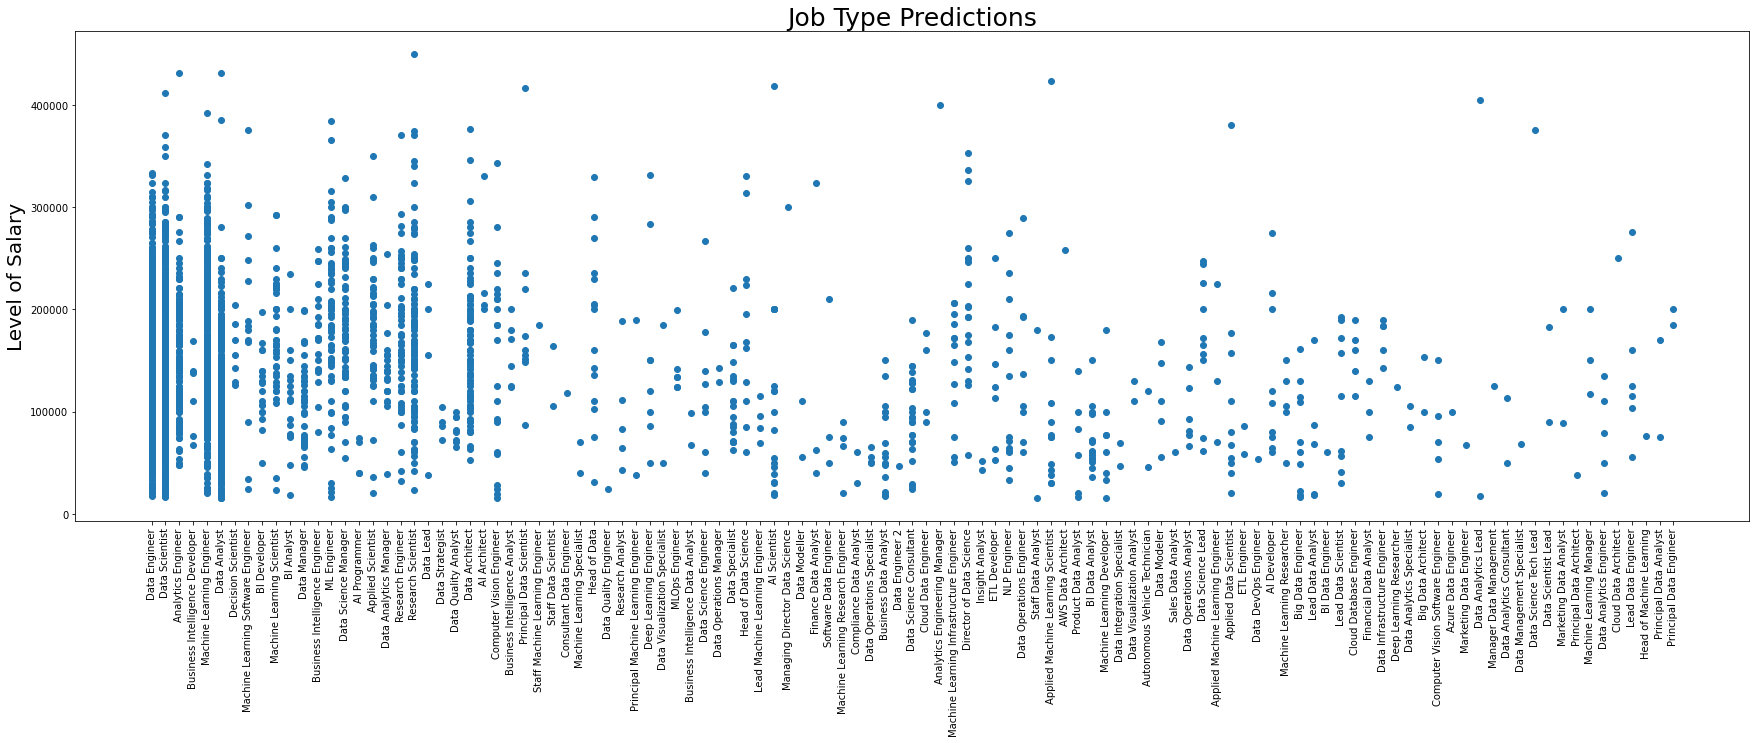

In [407]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,9))
plt.scatter(dataF.Job, dataF['Salary'])
plt.xticks(rotation=90)
plt.title("Job Type Predictions", fontsize=25)
plt.ylabel("Level of Salary", fontsize=20)

Text(0, 0.5, 'Salary for Jobs')

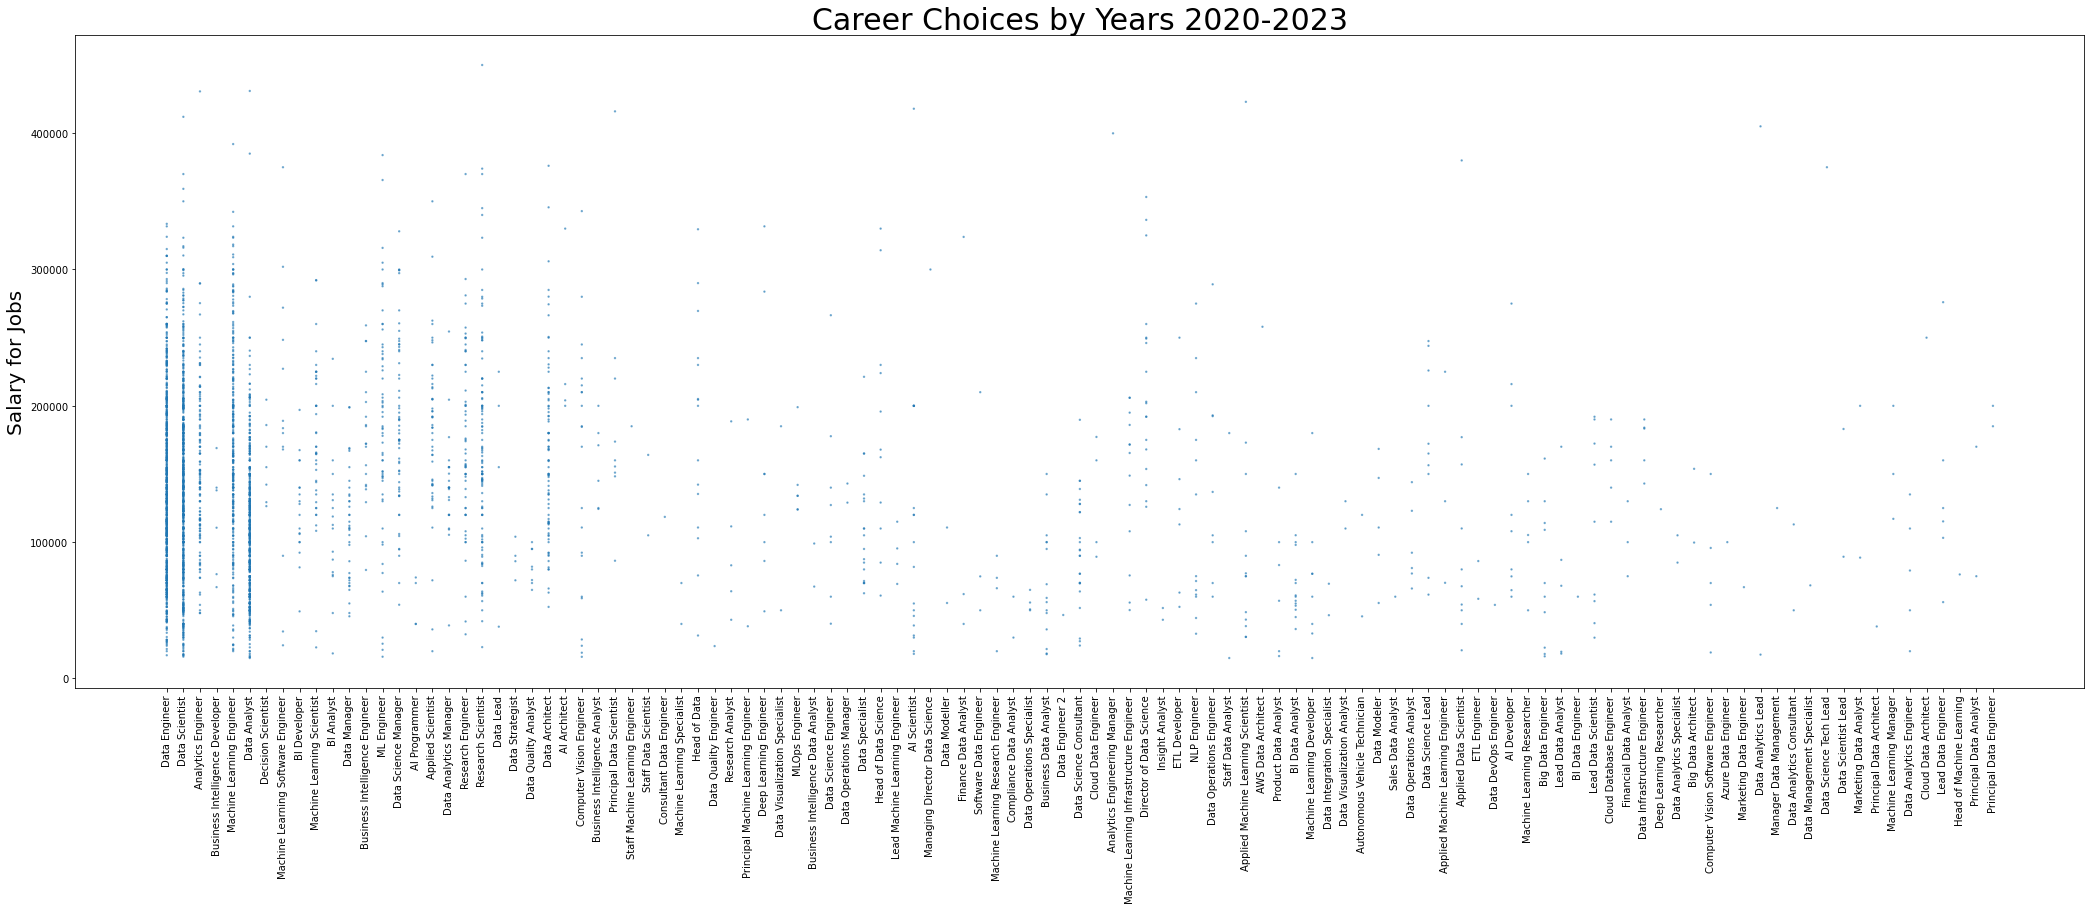

In [408]:
crr=dataF.drop(0)
plt.figure(figsize=(36,12))
plt.scatter(crr.Job, crr.Salary, s=crr.Year*0.001, alpha=0.5)
plt.xticks(rotation=90)
plt.title("Career Choices by Years 2020-2023", fontsize=30)
plt.ylabel("Salary for Jobs", fontsize=20)

Text(0.5, 1.0, 'Density for Salary of Jobs in the Dataset')

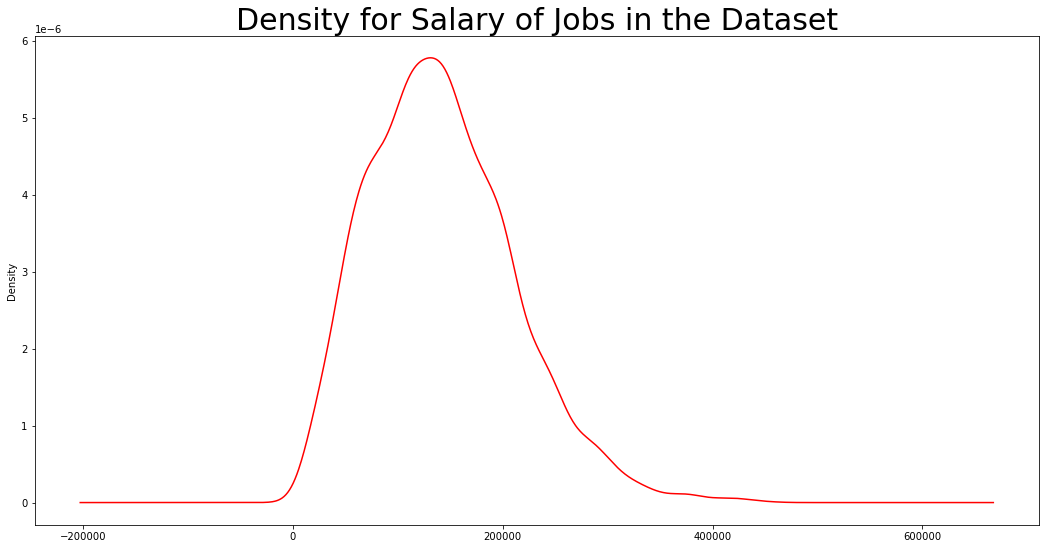

In [409]:
plt.figure(figsize=(18,9))
crr.Salary.plot.density(color='r')
plt.title("Density for Salary of Jobs in the Dataset", fontsize=30)

In [410]:
import numpy as np

In [411]:
bined=dataF

In [412]:
#Dropping for feature extraction based on feature importance rating

bined=bined.drop(['Type','Size'], axis=1)
bined.head()

,Job,Expertise Level,Salary,Year
0,Data Engineer,1,210000,2023
1,Data Engineer,1,165000,2023
2,Data Engineer,1,185900,2023
3,Data Engineer,1,129300,2023
4,Data Scientist,1,140000,2023


In [413]:
bined['Expertise Level'].unique()

array([1, 3, 2, 4], dtype=object)

In [414]:
bined['Salary'].max(),bined['Salary'].min()

(450000, 15000)

In [417]:
#Lower expertis level
bined.loc[(bined['Expertise Level'] >= 2), 'Expertise Level'] = 2

In [418]:
#Higher expertise level
bined.loc[(bined['Expertise Level'] != 2), 'Expertise Level'] = 1

In [419]:
bined.Year.unique()

array([2023, 2021, 2020, 2022], dtype=int64)

In [420]:
bined.head()

,Job,Expertise Level,Salary,Year
0,Data Engineer,1,210000,2023
1,Data Engineer,1,165000,2023
2,Data Engineer,1,185900,2023
3,Data Engineer,1,129300,2023
4,Data Scientist,1,140000,2023


Text(0, 0.5, 'Jobs')

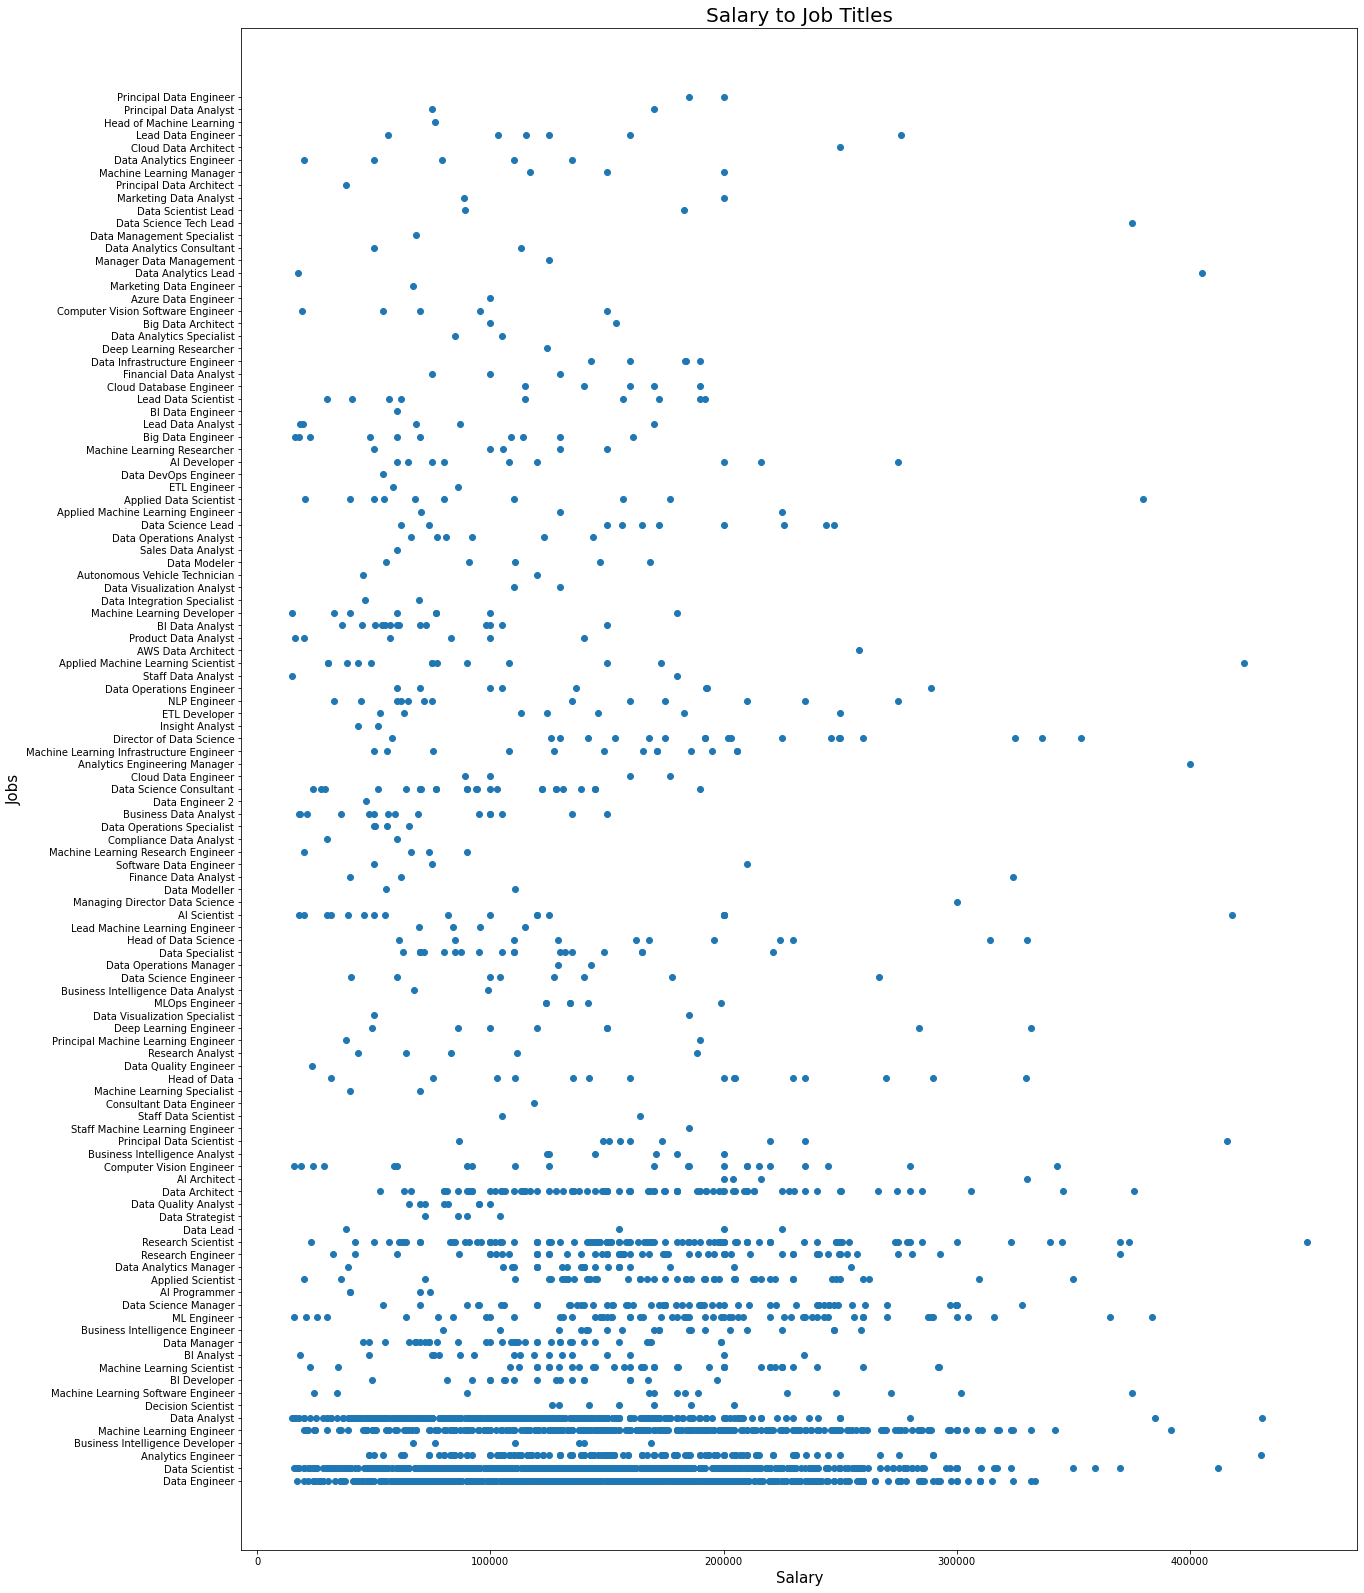

In [431]:
plt.figure(figsize=(20,28))
plt.scatter(bined.Salary,y)
plt.title("Salary to Job Titles", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Jobs", fontsize=15)


In [432]:
#top 4 Jobs in dataset
top_Jobs=bined.loc[bined['Job'].isin(['Data Analyst','Data Scientist', 
                                      'Data Engineer', 'Machine Learning Engineer'])]
top_Jobs.shape

(2096, 4)

Text(0, 0.5, 'Jobs')

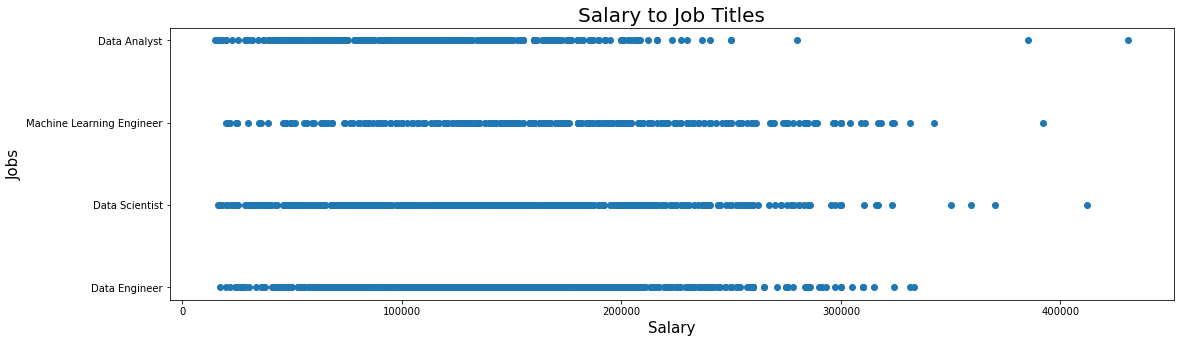

In [433]:
plt.figure(figsize=(18,5))
plt.scatter(top_Jobs.Salary,top_Jobs.Job)
plt.title("Salary to Job Titles", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Jobs", fontsize=15)


In [434]:
# Create dummies for categorical
Top_Jobs=pd.get_dummies(top_Jobs, columns=['Job'])

In [435]:
Top_Jobs.head(1)

,Expertise Level,Salary,Year,Job_Data Analyst,Job_Data Engineer,Job_Data Scientist,Job_Machine Learning Engineer
0,1,210000,2023,0,1,0,0


In [436]:
Jobs=Top_Jobs.rename(columns={'Job_Data Analyst':'Analyst','Job_Data Engineer':'Engineer',
                              'Job_Data Scientist':'Scientist','Job_Machine Learning Engineer':'ML'})

In [437]:
Jobs.head()

,Expertise Level,Salary,Year,Analyst,Engineer,Scientist,ML
0,1,210000,2023,0,1,0,0
1,1,165000,2023,0,1,0,0
2,1,185900,2023,0,1,0,0
3,1,129300,2023,0,1,0,0
4,1,140000,2023,0,0,1,0


Text(0, 0.5, 'Data Analyst')

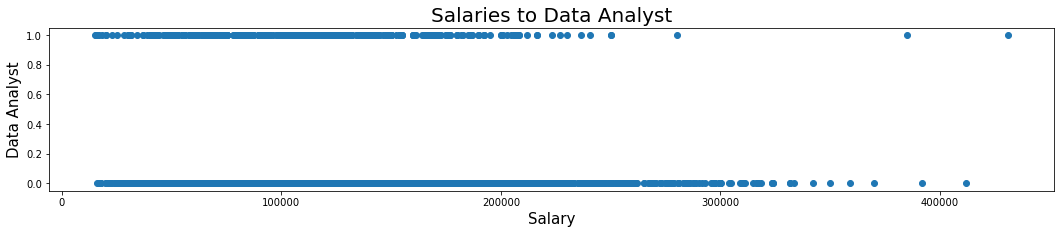

In [438]:
plt.figure(figsize=(18,3))
plt.scatter(Jobs.Salary,Jobs.Analyst)

plt.title("Salaries to Data Analyst", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Data Analyst", fontsize=15)

Text(0, 0.5, 'Data Engineer')

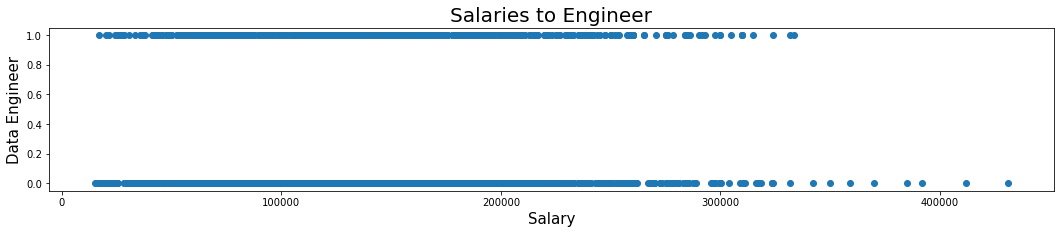

In [439]:
plt.figure(figsize=(18,3))
plt.scatter(Jobs.Salary,Jobs.Engineer)

plt.title("Salaries to Engineer", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Data Engineer", fontsize=15)

Text(0, 0.5, 'Data Scientist')

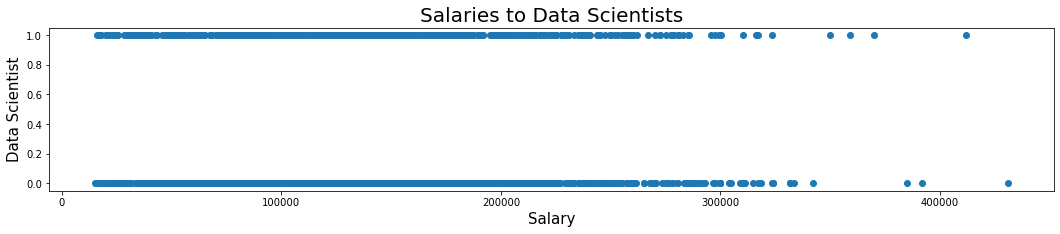

In [440]:
plt.figure(figsize=(18,3))
plt.scatter(Jobs.Salary,Jobs.Scientist)

plt.title("Salaries to Data Scientists", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Data Scientist", fontsize=15)

Text(0, 0.5, 'Machine Learning Engineer')

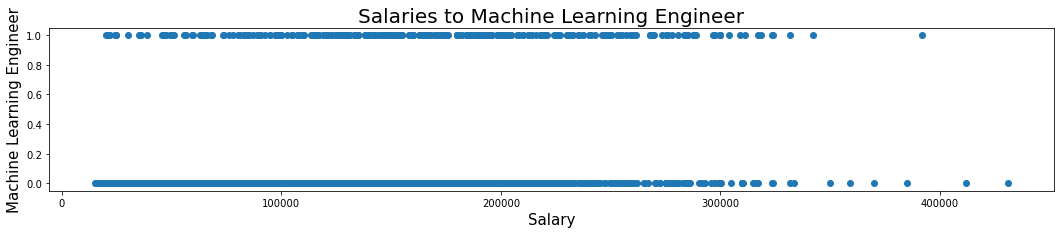

In [441]:
plt.figure(figsize=(18,3))
plt.scatter(Jobs.Salary,Jobs.ML)

plt.title("Salaries to Machine Learning Engineer", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Machine Learning Engineer", fontsize=15)

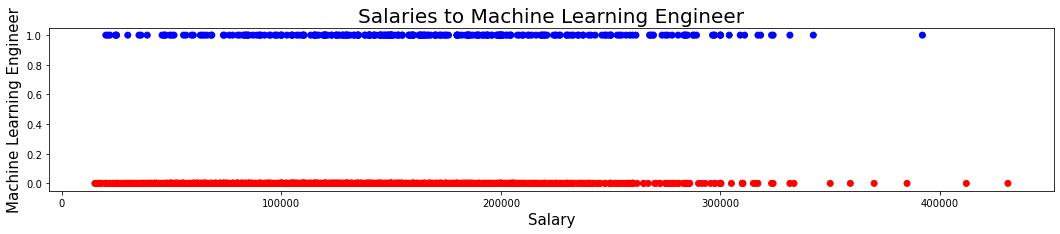

In [445]:
plt.figure(figsize=(18,3))
X = Jobs.Salary
Y = Jobs['ML'].values

colors = np.where(Y==0,"red","b")
plt.scatter(X,Y,c=colors)
plt.title("Salaries to Machine Learning Engineer", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Machine Learning Engineer", fontsize=15)
plt.show()

In [451]:
Jobs.head(1)

,Expertise Level,Salary,Year,Analyst,Engineer,Scientist,ML
0,1,210000,2023,0,1,0,0


In [453]:
Jobs.Salary.unique()

array([210000, 165000, 185900, ..., 119059,  28369, 412000], dtype=int64)

In [457]:
Jobs.max(),Jobs.min()

(Expertise Level         2
 Salary             430967
 Year                 2023
 Analyst                 1
 Engineer                1
 Scientist               1
 ML                      1
 dtype: object,
 Expertise Level        1
 Salary             15000
 Year                2020
 Analyst                0
 Engineer               0
 Scientist              0
 ML                     0
 dtype: object)

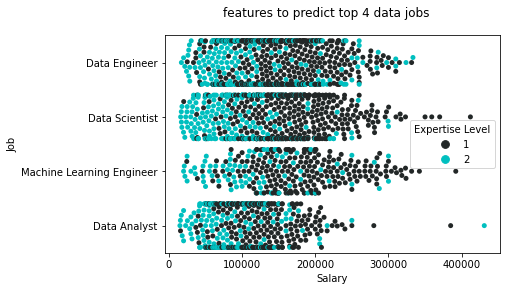

In [463]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figsize=(20, 16)
plt.suptitle('features to predict top 4 data jobs')

sns.swarmplot(data=top_Jobs, x='Salary', 
              y='Job',hue="Expertise Level", color='c')

plt.show()

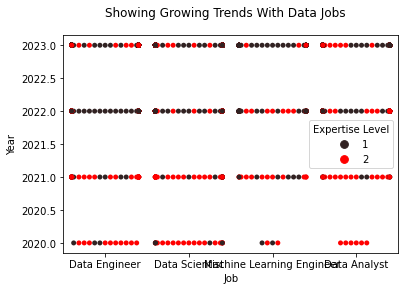

In [531]:
#This shows a growing interest and retention in the field 
#with a shown increase for higher level expertise in 2022 & 2023 V.S
plt.figsize=(20, 19)
plt.suptitle('Showing Growing Trends With Data Jobs')

sns.swarmplot(data=top_Jobs, x='Job', 
              y='Year',hue="Expertise Level", color='r')

plt.show()

In [465]:
Jobs.loc[(Jobs['Salary'] >= 216233), 'Salary'] = 1

In [466]:
Jobs.loc[(Jobs['Salary'] != 1), 'Salary'] = 2

In [468]:
Jobs=Jobs.drop(['Year'],axis=1)

In [469]:
Jobs.head()

,Expertise Level,Salary,Analyst,Engineer,Scientist,ML
0,1,2,0,1,0,0
1,1,2,0,1,0,0
2,1,2,0,1,0,0
3,1,2,0,1,0,0
4,1,2,0,0,1,0


In [470]:
#Multivariate Linear Regression for Top Jobs target="Salary"
from sklearn import linear_model

In [507]:
#the independent variables
x=Jobs.drop(['Analyst','Engineer','Scientist', 'ML'], axis=1)
x.shape

(2096, 2)

In [508]:
#the dependent variable
y=Jobs[['Analyst','Engineer','Scientist', 'ML']].values
y.shape

(2096, 4)

In [509]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [510]:
reg=linear_model.LinearRegression()

In [511]:
reg.fit(x_train,y_train)

LinearRegression()

In [512]:
from sklearn.metrics import mean_squared_error, r2_score

In [513]:
reg.coef_, reg.intercept_

(array([[ 0.00068337,  0.21076981],
        [ 0.0348582 , -0.04950709],
        [ 0.0037746 , -0.02467576],
        [-0.03931617, -0.13658695]]),
 array([-0.17621008,  0.3726516 ,  0.34857396,  0.45498452]))

In [514]:
prediction=reg.predict(x_test)

In [521]:
r2=r2_score(y_test,prediction)
r2

0.008829114348629263

In [520]:
per='%.3f'% r2
print(per,'%')

0.009 %


In [522]:
job_class.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)

In [523]:
y_pred=job_class.predict(x_test)

In [524]:
accuracy_score(y_test,y_pred)*100

1.1904761904761905

In [525]:
listOFeatures=list(x.columns)
feature_importance=pd.Series(job_class.feature_importances_,index=listOFeatures).sort_values(ascending=False)
print("The following shows the rates of features impact on job class predictions with Jobs: ")
print(feature_importance)

The following shows the rates of features impact on job class predictions with Jobs: 
Salary             0.84229
Expertise Level    0.15771
dtype: float64


In [526]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [527]:
predz=model.predict(x_test)

In [528]:
print("The accuracy of the model = ", metrics.accuracy_score(y_test, predz)*100)

The accuracy of the model =  1.1904761904761905


In [1]:
listedFeatures=list(x.columns)
feature_importance=pd.Series(model.feature_importances_,index=listedFeatures).sort_values(ascending=False)
print("The following shows the rates of features impact on Jobs for class predictions as RF: ")
print(feature_importance)

NameError: name 'x' is not defined